
## Predictive Modeling

1. Built a regression model to predict the aggregate rating of a restaurant based on available features. Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.

2. Experimented with different algorithms (e.g.linear regression, decision trees, random forest) and compare their performance.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [7]:
df = pd.read_csv('Dataset .csv')

1. Building a regression model to predict the aggregate rating of a restaurant based on available features.                           Spliting the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.

In [8]:
# Feature Engineering
df['Has Table booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Online delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

In [9]:
# Define features and target variable
features = ['Price range', 'Has Table booking', 'Has Online delivery']
X = df[features]
y = df['Aggregate rating']

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    
    'Random Forest': RandomForestRegressor(random_state=42)
}

2. Experimenting with different algorithms (e.g.linear regression, decision trees, random forest) and comparing their performance.

In [13]:
# Train and evaluate models 

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

In [15]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

In [16]:
results[model_name] = {
        'Training MSE': train_mse,
        'Testing MSE': test_mse,
        'Training R^2': train_r2,
        'Testing R^2': test_r2
    }


In [17]:
for model_name, metrics in results.items():
    print(f'{model_name}:')
    print(f'  Train MSE: {metrics["Training MSE"]:.2f}')
    print(f'  Test MSE: {metrics["Testing MSE"]:.2f}')
    print(f'  Train R²: {metrics["Training R^2"]:.2f}')
    print(f'  Test R²: {metrics["Testing R^2"]:.2f}')
    print()

Random Forest:
  Train MSE: 1.72
  Test MSE: 1.69
  Train R²: 0.25
  Test R²: 0.26



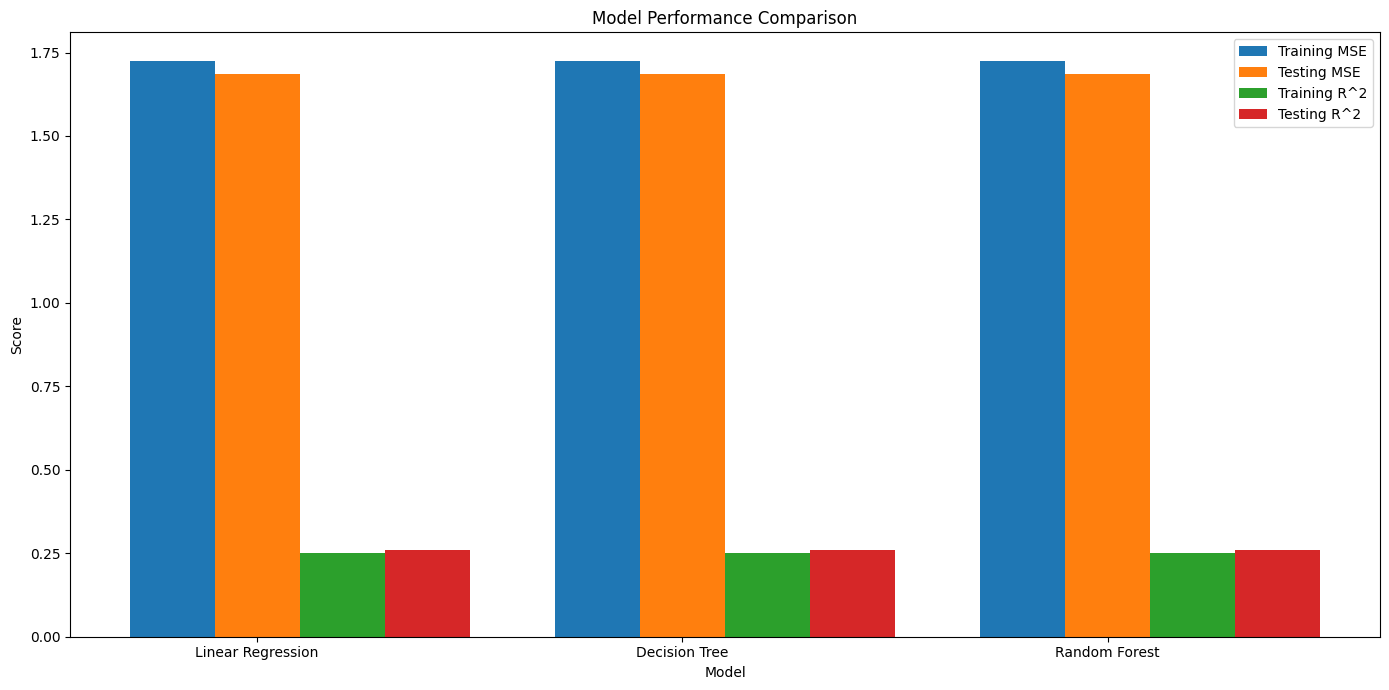

In [30]:
x = np.arange(len(models))  # label locations
width = 0.2  # width of the bars

fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar(x - width, train_mse, width, label='Training MSE')
rects2 = ax.bar(x, test_mse, width, label='Testing MSE')
rects3 = ax.bar(x + width, train_r2, width, label='Training R^2')
rects4 = ax.bar(x + 2 * width, test_r2, width, label='Testing R^2')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()



## Customer Preference Analysis



1. Analyzed the relationship between the type of cuisine and the restaurant's rating.

2. Identified the most popular cuisines among customers based on the number of votes.

3. Determined if there are any specific cuisines that tend to receive higher ratings.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
df = pd.read_csv('Dataset .csv')

In [21]:
# Check for missing values
print(df[['Cuisines', 'Aggregate rating']].isnull().sum())


Cuisines            9
Aggregate rating    0
dtype: int64


In [22]:
df = df.dropna(subset=['Cuisines', 'Aggregate rating'])

In [23]:
# Group by 'cuisine_type' and calculate the average rating
cuisine_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

1. Analyzing the relationship between the type of cuisine and the restaurant's rating.

In [24]:
print(cuisine_rating)

Cuisines
Burger, Bar Food, Steak                 4.9
American, Burger, Grill                 4.9
American, Caribbean, Seafood            4.9
American, Coffee and Tea                4.9
Mexican, American, Healthy Food         4.9
                                       ... 
Tibetan, South Indian, North Indian     0.0
Afghani, Mughlai, Chinese               0.0
Tibetan                                 0.0
Turkish, Arabian, Moroccan, Lebanese    0.0
Tibetan, Chinese, North Indian          0.0
Name: Aggregate rating, Length: 1825, dtype: float64


In [25]:
# Group by 'cuisine_type' and sum the 'votes'
cuisine_votes = df.groupby('Cuisines')['Votes'].sum().reset_index()

In [26]:
# Sort cuisines by total votes in descending order
cuisine_votes_sorted = cuisine_votes.sort_values(by='Votes', ascending=False)

2. Identifying the most popular cuisines among customers based on the number of votes.

In [27]:
# Display the sorted result
print(cuisine_votes_sorted)

                                        Cuisines  Votes
1514                       North Indian, Mughlai  53747
1306                                North Indian  46241
1329                       North Indian, Chinese  42012
331                                         Cafe  30657
497                                      Chinese  21925
...                                          ...    ...
885              Fast Food, South Indian, Mithai      0
1509               North Indian, Mithai, Chinese      0
1259  Mithai, South Indian, Chinese, Street Food      0
1816        Turkish, Arabian, Moroccan, Lebanese      0
1811         Tibetan, South Indian, North Indian      0

[1825 rows x 2 columns]


3. Determine if there are any specific cuisines that tend to receive higher ratings.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset 
df = pd.read_csv('Dataset .csv')

# Group by cuisine_type and calculate average rating
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort cuisines by average rating in descending order
cuisine_ratings_sorted = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

# Print sorted cuisine ratings
print(cuisine_ratings_sorted)

                                  Cuisines  Aggregate rating
302                Burger, Bar Food, Steak               4.9
33                 American, Burger, Grill               4.9
37            American, Caribbean, Seafood               4.9
41                American, Coffee and Tea               4.9
1214       Mexican, American, Healthy Food               4.9
...                                    ...               ...
1811   Tibetan, South Indian, North Indian               0.0
1                Afghani, Mughlai, Chinese               0.0
1806                               Tibetan               0.0
1816  Turkish, Arabian, Moroccan, Lebanese               0.0
1808        Tibetan, Chinese, North Indian               0.0

[1825 rows x 2 columns]



## Data Visualization

1. Created visualizations to represent the distribution of ratings using different charts (histogram, bar plot)

2. Compared the average ratings of different (a) cuisines or (b) cities using appropriate visualizations.

3. Visualized the relationship between various features and the target variable to gain insights.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Dataset .csv')

1. Create visualizations to represent the distribution of ratings using different charts (histogram)

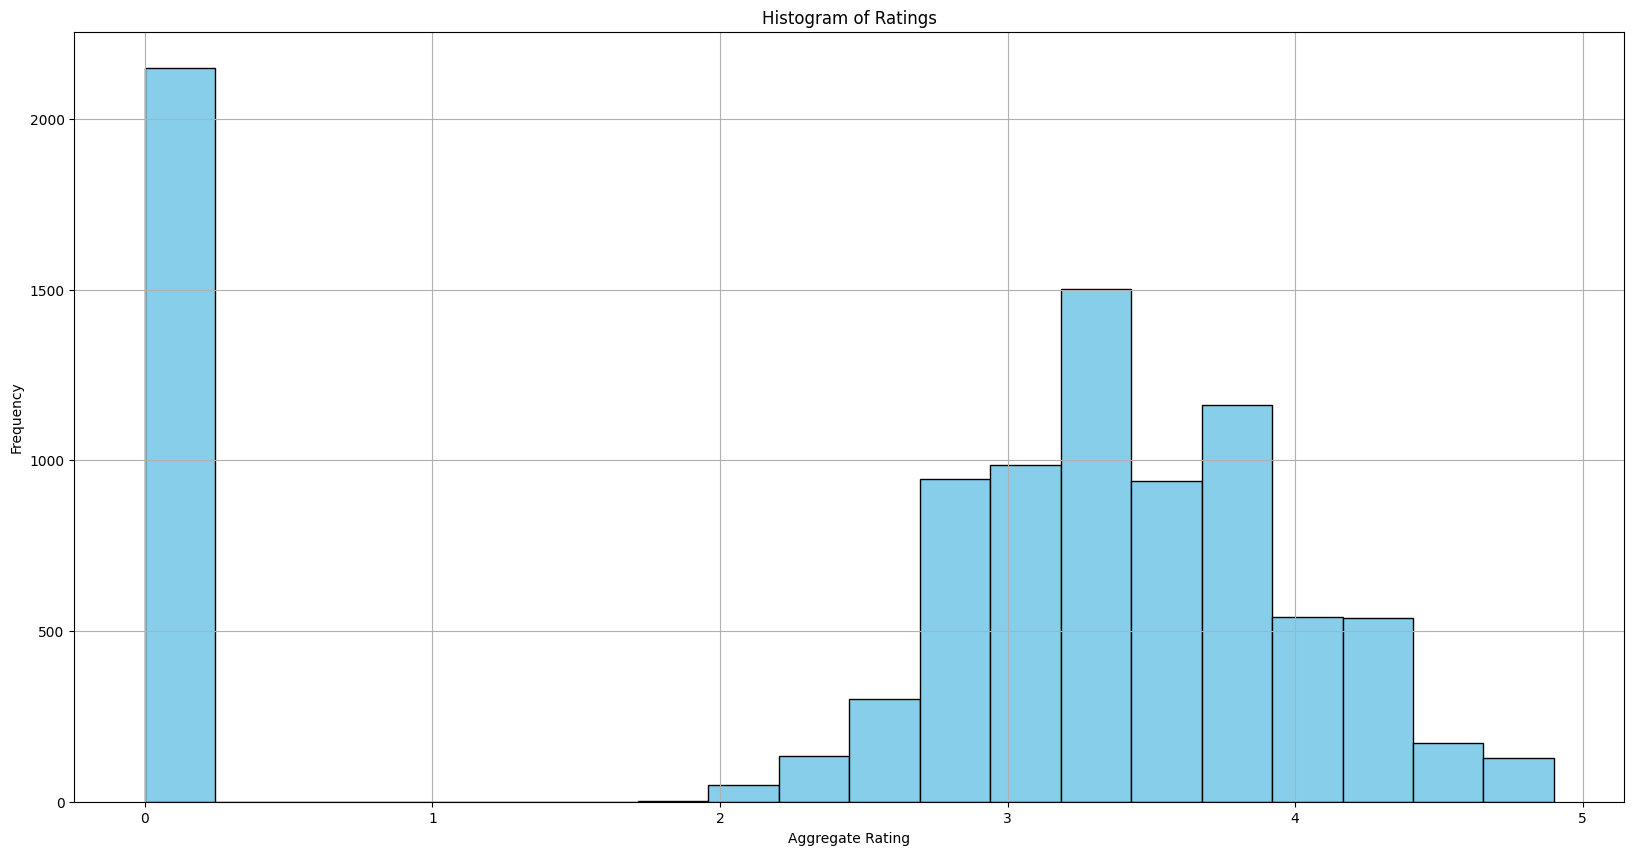

In [78]:
# Plot 1: Histogram of Ratings
plt.figure(figsize=(20, 10))
plt.hist(df['Aggregate rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

2. Compare the average ratings of different cuisines using appropriate visualizations.

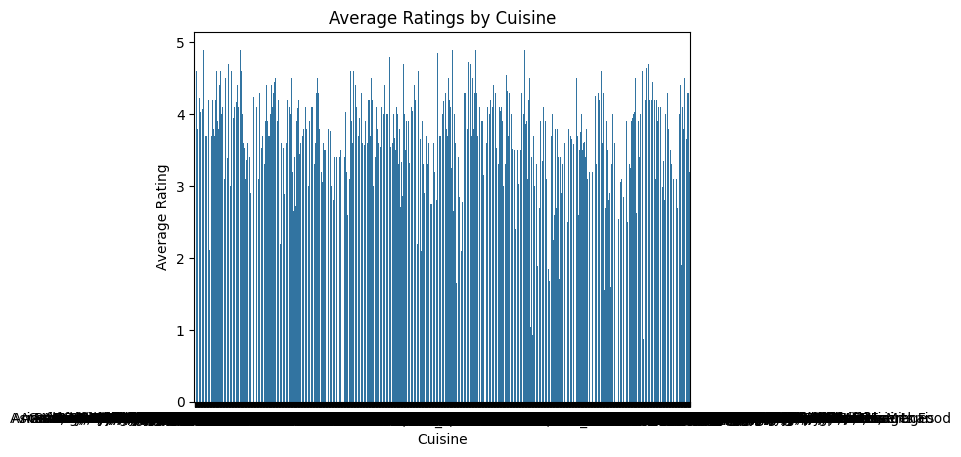

In [31]:
#Bar Plot of Average Ratings by Cuisine
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
sns.barplot(x='Cuisines', y='Aggregate rating', data=cuisine_ratings)
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Cuisine')
plt.show()

Compare the average ratings of different cities using appropriate visualizations.

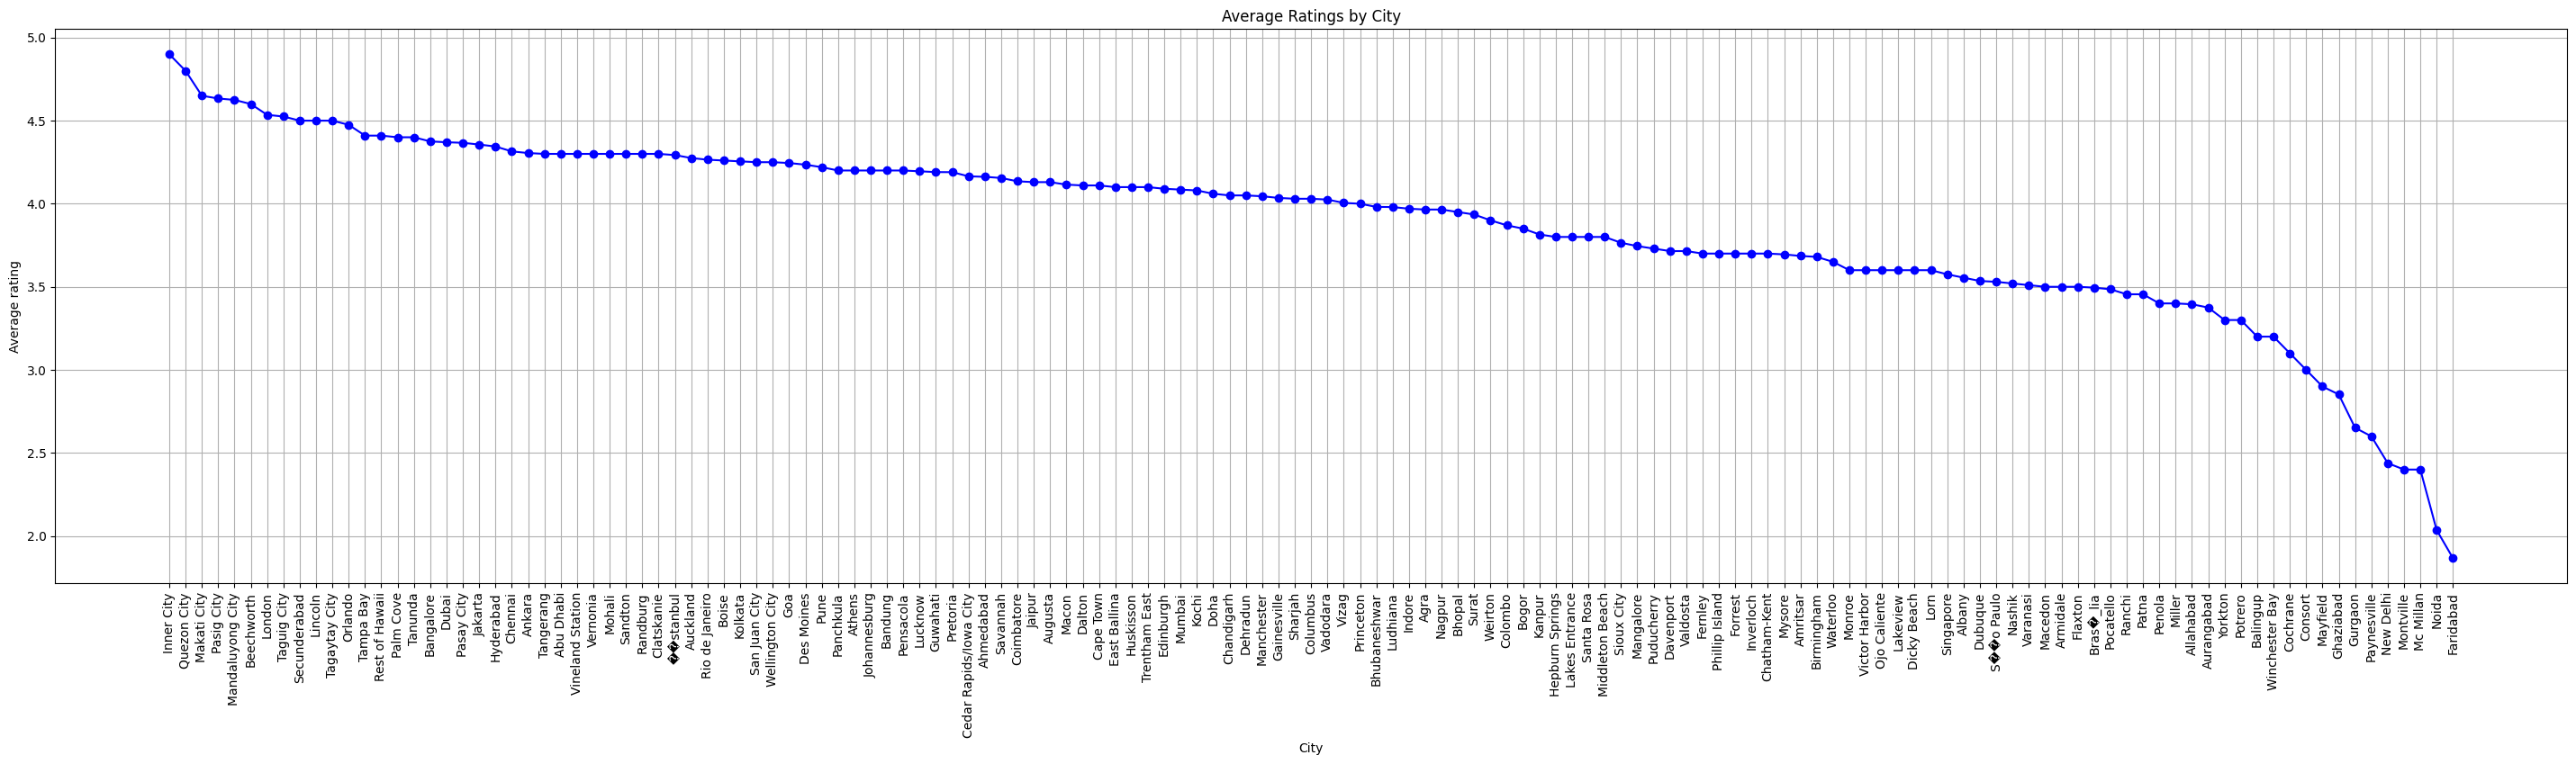

In [126]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('Dataset .csv')

# Calculate average ratings by city
avg_ratings_city = df.groupby('City')['Aggregate rating'].mean().reset_index()

# Sort values for better visualization
avg_ratings_city = avg_ratings_city.sort_values(by='Aggregate rating', ascending=False)

# Plotting Line Graph of Average Ratings by City
plt.figure(figsize=(, 8))
plt.plot(avg_ratings_city['City'], avg_ratings_city['Aggregate rating'], marker='o', linestyle='-', color='b')
plt.title('Average Ratings by City')
plt.xlabel('City')
plt.ylabel('Average rating')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.show()

Visualize the relationship between various features and the target variable to gain insights.

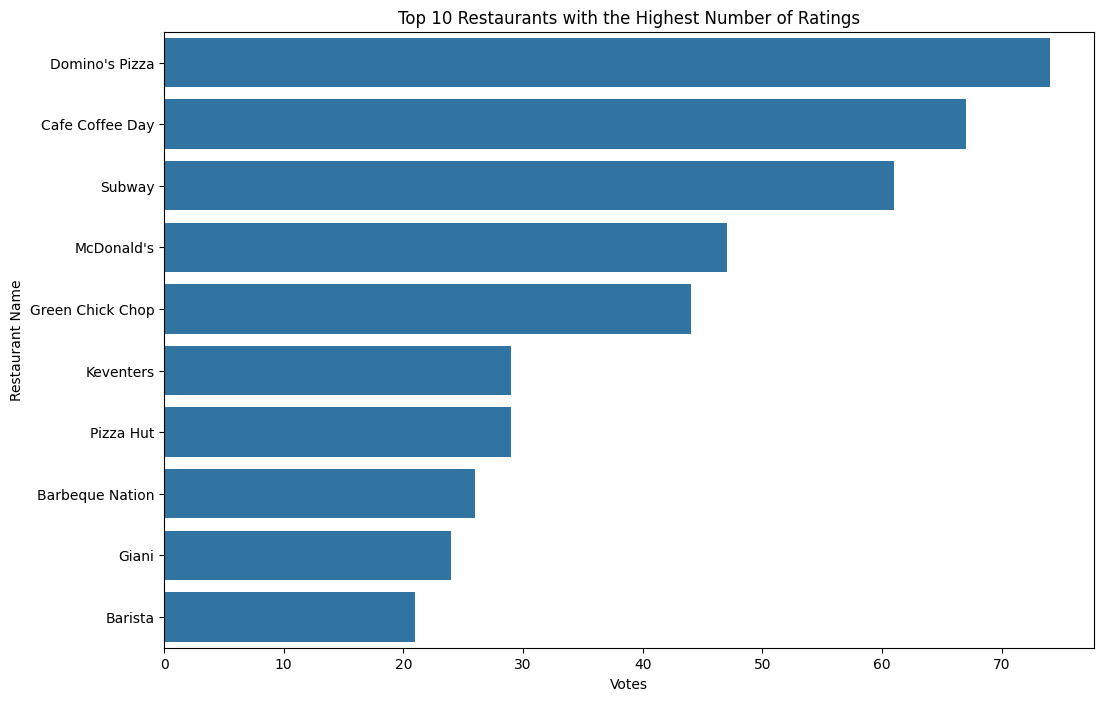

In [29]:
#Displaying Top 10 with highest number of ratings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Dataset .csv')

# Mapping text ratings to numerical values for better visualization
rating_map = {'Excellent': 5, 'Very Good': 4, 'Good': 3, 'Average': 2, 'Poor': 1, 'Not rated': 0}
df['text_rating_numeric'] = df['Rating text'].map(rating_map)

# Remove 'Not Rated' entries
df_filtered = df[df['text_rating_numeric'] != 0]

# Count the number of ratings for each restaurant
rating_counts = df_filtered['Restaurant Name'].value_counts()

# Select the top 10 restaurants with the highest number of ratings
top_10_restaurants = rating_counts.head(10).index
df_top_10 = df_filtered[df_filtered['Restaurant Name'].isin(top_10_restaurants)]

# Plotting
plt.figure(figsize=(12, 8))
sns.countplot(data=df_top_10, y='Restaurant Name', order=top_10_restaurants)
plt.title('Top 10 Restaurants with the Highest Number of Ratings')
plt.xlabel('Votes')
plt.ylabel('Restaurant Name')
plt.show()

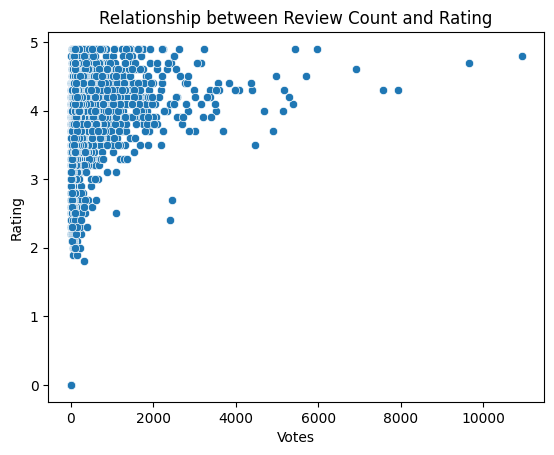

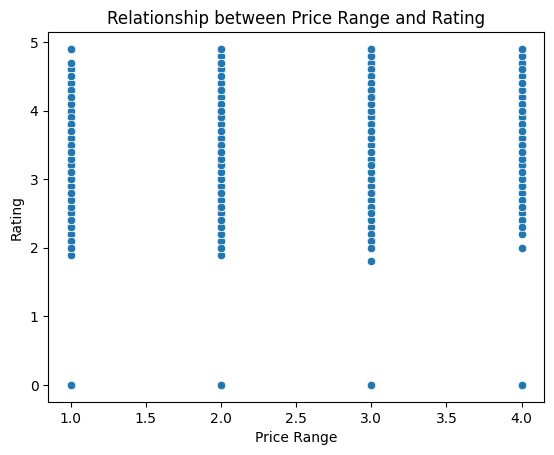

In [32]:
#Scatter Plot of Features vs. Target Variable
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.title('Relationship between Review Count and Rating')
plt.show()
sns.scatterplot(x='Price range', y='Aggregate rating', data=df)
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.title('Relationship between Price Range and Rating')
plt.show()

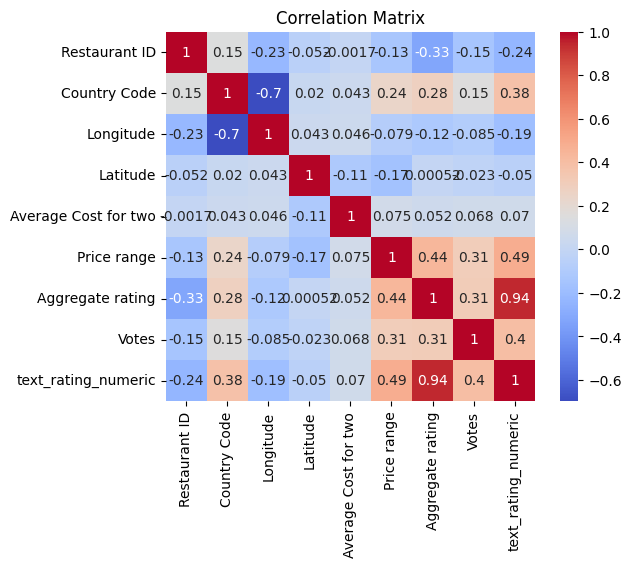

In [33]:
# Heatmap of Correlation Matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()